# Imports

In [ ]:
import scipy
import scipy.io
import numpy as np
import pandas as pd
from time import time
import heapq
import pyLDAvis
import pyLDAvis.gensim  
import gensim
import gensim.corpora as corpora
from gensim.models.callbacks import ConvergenceMetric
from gensim.models import CoherenceModel
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
# load training data
tokens = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_tr_tokens.mat')['tokens'].squeeze()
counts = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_tr_counts.mat')['counts'].squeeze()

In [73]:
# load dictionary
d = np.load('/home/jupyter/ETM/scripts/diag_dim60/dictionary.npy',allow_pickle=True).item()
word2ids = d['word2id']
id2words = d['id2word']
icd92eng =  np.load('/home/jupyter/icd92eng.npy',allow_pickle=True).item()

In [75]:
# transform the data into right input format
text = []
for i in range(tokens.shape[0]):
    a= []
    for j in range(tokens[i][0].shape[0]):
        for c in range(counts[i][0][j]):
            a.append(id2words[tokens[i][0][j]])
    text.append(a)
    # text.append([id2words[x] for x in tokens[i][0]])

In [77]:
text1 = text
id2word=corpora.Dictionary(text1)
corpus = [id2word.doc2bow(text) for text in text1]

In [51]:
def best_topic_num(dic,corpus,data,start,end,step):
    coherence_values = []
    model_list = []
    for num_topics in range(start,end, step):
        t0=time()
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dic,
                                           num_topics=num_topics , 
                                           random_state=0,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data, dictionary=dic, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('# %d is completed! This step costs %s sec'%(num_topics,str(time()-t0)))
        print(coherencemodel.get_coherence())

    return model_list, coherence_values

# 2 is completed! This step costs 16.491544246673584 sec
0.5812722200694616
# 3 is completed! This step costs 19.539717197418213 sec
0.49420651612196914
# 4 is completed! This step costs 18.649108409881592 sec
0.5844902649473878
# 5 is completed! This step costs 18.635459423065186 sec
0.6468870598469822
# 6 is completed! This step costs 19.460153102874756 sec
0.6365981125642475
# 7 is completed! This step costs 19.732100009918213 sec
0.6312587838714859
# 8 is completed! This step costs 20.59230923652649 sec
0.6442431540187188
# 9 is completed! This step costs 21.425506114959717 sec
0.6211122127278593
# 10 is completed! This step costs 21.514434099197388 sec
0.5924823567193338
# 11 is completed! This step costs 21.840014457702637 sec
0.5907002105682979
# 12 is completed! This step costs 22.520885944366455 sec
0.6109017976476775
# 13 is completed! This step costs 23.31772804260254 sec
0.6242604605009953
# 14 is completed! This step costs 23.164355516433716 sec
0.5798062653358589
# 15 is 

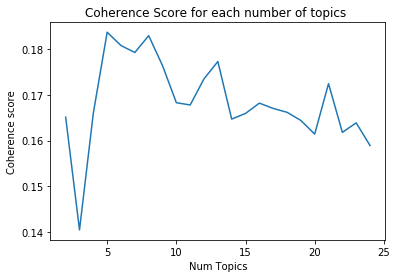

In [52]:
# run the model and choose the best model
model_list, coherence_values = best_topic_num(dic=id2word, 
                                            corpus=corpus, 
                                            data=text1, 
                                            start=2, 
                                            end=25, 
                                            step=1)
# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
num_topic_range = range(2, 25, 1)
for x,y in zip(num_topic_range, coherence_values):
    print("Num Topics =", x, " has Coherence Value of", y)
plt.plot(num_topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score for each number of topics ")
plt.show()

In [79]:
# the best topic number is 5
t0=time()
lda_model_best = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=0,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)
print("done in %0.5fs." % (time() - t0))
pprint(lda_model_best.print_topics())


done in 15.09331s.
[(0,
  '0.074*"7742" + 0.045*"769" + 0.037*"7793" + 0.032*"77081" + 0.031*"76518" + '
  '0.029*"76527" + 0.029*"76528" + 0.026*"7706" + 0.024*"76519" + '
  '0.022*"7746"'),
 (1,
  '0.047*"4019" + 0.027*"51881" + 0.023*"5990" + 0.018*"5070" + 0.016*"25000" '
  '+ 0.016*"42731" + 0.013*"5849" + 0.012*"2449" + 0.012*"53081" + '
  '0.012*"2760"'),
 (2,
  '0.026*"5849" + 0.025*"99592" + 0.022*"0389" + 0.022*"4019" + 0.020*"3572" + '
  '0.019*"78552" + 0.017*"40391" + 0.015*"5990" + 0.013*"5856" + '
  '0.013*"25060"'),
 (3,
  '0.059*"41401" + 0.056*"4019" + 0.052*"4280" + 0.050*"42731" + 0.030*"2724" '
  '+ 0.029*"25000" + 0.021*"2720" + 0.017*"5849" + 0.016*"53081" + '
  '0.016*"40390"'),
 (4,
  '0.017*"5849" + 0.016*"51881" + 0.015*"2762" + 0.014*"2875" + 0.013*"2851" + '
  '0.012*"5712" + 0.011*"5715" + 0.011*"2761" + 0.010*"4019" + 0.010*"07054"')]


In [80]:
# Compute Perplexity 
variational_bound = lda_model_best.log_perplexity(corpus)
print('\nVariational_bound', variational_bound)
print('\nPerplexity: ', 2**(-variational_bound) )# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_best, texts=text1, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)#the bigger the better!


Variational_bound -6.267028462578021

Perplexity:  77.01291301792781

Coherence Score:  0.6468870598469822


In [81]:
#Calculate the topic diversity; The higher the better
def calculate_td(model_mat,max_words=25):
    s= set()
    n = model_mat.shape[0]
    for i in range(n):
        nums = list(model_mat[i])
        max_num_index_list = map(nums.index, heapq.nlargest(max_words, nums))
        s.update(tuple(max_num_index_list))
    return len(s)/max_words/n

In [82]:
lda_mat = lda_model_best.get_topics()
lda_td = calculate_td(lda_mat) 
lda_td

0.696

In [16]:
lda_mat = lda_model_best.get_topics()
lda_td = calculate_td(lda_mat) 

In [45]:
# convergence plot
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=0,
                                           eval_every=1,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)
import re
import matplotlib.pyplot as plt
p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
matches = [p.findall(l) for l in open('gensim.log')]
matches = [m for m in matches if len(m) > 0]
tuples = [t[0] for t in matches]
perplexity = [float(t[1]) for t in tuples]
liklihood = [float(t[0]) for t in tuples]
iter = list(range(0,len(tuples)*10,10))
plt.plot(iter,liklihood,c="black")
plt.ylabel("Variational bound")
plt.xlabel("iteration")
plt.title("Topic Model Convergence")
plt.grid()
plt.savefig("variational_bound_new.pdf")
plt.close()

<>:12: DeprecationWarning: invalid escape sequence \d
<>:12: DeprecationWarning: invalid escape sequence \d
<>:12: DeprecationWarning: invalid escape sequence \d
<ipython-input-45-ff1812c8af56>:12: DeprecationWarning: invalid escape sequence \d
  p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")


In [85]:
phenotype = pd.DataFrame(lda_mat.T)
phenotype.reset_index(inplace=True)
phenotype.rename(columns={"index": "id"},inplace=True)
phenotype["icd9"] = "0"
phenotype["eng"] = "0"
unknown_counts = 0
for i in range(phenotype.shape[0]):
    s = id2word[i]
    phenotype["icd9"][i] = s
    if s in icd92eng:
        phenotype["eng"][i]=icd92eng[s]
    else: 
        phenotype["eng"][i] = s
        unknown_counts +=1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [86]:
phenotype = phenotype.rename(columns = {0:"topic1",1:"topic2",2:"topic3",3:"topic4",4:"topic5",5:"topic6",6:"topic7"})

## HDP

In [22]:
from gensim.models import HdpModel
t0=time()
hdp = HdpModel(corpus, id2word)
print("done in %0.5fs." % (time() - t0))
coherence_model_hdp = CoherenceModel(model=hdp, texts=text1, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp)#the bigger the better!

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


done in 82.46021s.

Coherence Score:  0.5289288745101867


In [23]:
hdp_mat = hdp.get_topics()
hdp_td = calculate_td(hdp_mat) 

In [24]:
hdp_td

0.10640000000000001

## Visualization

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_best, corpus, id2word)
vis

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.099580 -0.151671       1        1  27.800549
1      0.123407  0.093037       2        1  22.353415
4      0.102362 -0.025292       3        1  13.247553
2      0.103767  0.101798       4        1  12.611328
5      0.055360  0.186547       5        1  10.491467
0      0.024154 -0.222705       6        1   7.871969
3     -0.508630  0.018285       7        1   5.623722, topic_info=    Category          Freq   Term         Total  loglift  logprob
4    Default   9387.000000  41401   9387.000000  30.0000  30.0000
2    Default  15100.000000   4019  15100.000000  29.0000  29.0000
20   Default   1795.000000   7742   1795.000000  28.0000  28.0000
19   Default   1103.000000    769   1103.000000  27.0000  27.0000
72   Default   3005.000000  99592   3005.000000  26.0000  26.0000
..       ...           ...    ...           ...      ...      ...
558   Topic7    327.197845  86121    338.718689   2.8436  -4.2879
567   Topic7    254.644287   8052    261.485077   2.8517  -4.5386
158   Topic7    301.298035   8600    329.565338   2.7885  -4.3703
298   Topic7    169.104019   8730    318.260010   2.2458  -4.9479
607   Topic7    169.979858   7455    509.685333   1.7801  -4.9427

[504 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
447       1  0.005565  00845
447       2  0.632829  00845
447       3  0.070756  00845
447       4  0.258379  00845
447       5  0.031005  00845
...     ...       ...    ...
260       5  0.003320  99859
260       6  0.002214  99859
260       7  0.001107  99859
323       4  0.988023   9986
1836      4  0.994067   9998

[1174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 5, 3, 6, 1, 4])

## Word cloud

In [26]:
newdict = dict(zip(list(phenotype.icd9.values),list(phenotype.eng.values)))

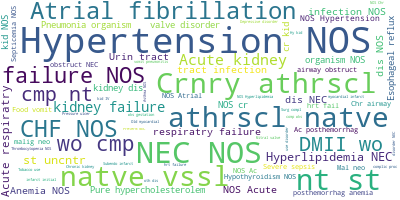

In [28]:
text=['.'.join([newdict[word] for word in doc]) for doc in text1]
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(text)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Prediction 

In [29]:
test_tokens1 = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_ts_h1_tokens.mat')['tokens'].squeeze()
test_counts1 = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_ts_h1_counts.mat')['counts'].squeeze()

In [30]:
test_tokens2 = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_ts_h2_tokens.mat')['tokens'].squeeze()
test_counts2 = scipy.io.loadmat('/home/jupyter/ETM/scripts/diag_dim60/bow_ts_h2_counts.mat')['counts'].squeeze()

In [31]:
test_text1 = []
for i in range(test_tokens1.shape[0]):
    test_text1.append([id2words[x] for x in test_tokens1[i][0]])
test_text2 = []
for i in range(test_tokens2.shape[0]):
    test_text2.append([id2words[x] for x in test_tokens2[i][0]])

In [33]:
topic_num = 5
score = np.zeros((len(test_text1),7))
for i in range(len(test_text1)):
    ques_vec = id2word.doc2bow(test_text1[i])
    topic_vec = lda_model_best[ques_vec][0]
    if len(topic_vec)==topic_num:
        score[i] = [x[1] for x in topic_vec]
    else:
        d= dict(topic_vec)
        for j in range(topic_num):
            score[i][j] = d.get(j,0)     
score

array([[0.01129702, 0.016353  , 0.01232105, ..., 0.01684356, 0.02022998,
        0.01020815],
       [0.01599043, 0.02313646, 0.01743973, ..., 0.02383762, 0.02859687,
        0.01444918],
       [0.01599117, 0.43663359, 0.0174408 , ..., 0.02386086, 0.02865402,
        0.4316428 ],
       ...,
       [0.01599122, 0.02314253, 0.01744149, ..., 0.02384439, 0.85817695,
        0.0144499 ],
       [0.01129713, 0.89667743, 0.01232103, ..., 0.01684469, 0.02024278,
        0.01020825],
       [0.02737005, 0.03959826, 0.02985045, ..., 0.75109696, 0.04892528,
        0.02473196]])

In [88]:
word2id= dict(zip(id2word.values(),id2word.keys()))
prob_mat = np.log(np.matmul(score,lda_mat))

In [36]:
test_per = []
for i in range(len(test_text2)):
    perplexity_score = 0
    ques_vec = [word2id[x] for x in test_text2[i] if x in word2id]
    for j in ques_vec:
        perplexity_score+=prob_mat[i][j]
    perplexity_score = perplexity_score/len(ques_vec)
    test_per.append(perplexity_score)

In [37]:
print("log perplexity",np.mean(test_per))
print("perplexity",np.exp(-np.mean(test_per)))

log perplexity -6.02073714213386
perplexity 411.8820994999371


In [90]:
data_vec = [[word2id[x] for x in xx ] for xx in text1]

In [91]:
# get word count in each document
def get_document_frequency(data, wi, wj=None):
    if wj is None:
        D_wi = 0
        for l in range(len(data)):
            doc = data[l]
            if wi in doc:
                D_wi += 1
        return D_wi
    D_wj = 0
    D_wi_wj = 0
    for l in range(len(data)):
        doc = data[l]
        if wj in doc:
            D_wj += 1
            if wi in doc:
                D_wi_wj += 1
    return D_wj, D_wi_wj 

In [92]:
def get_topic_coherence(beta, data):
    D = len(data) ## number of docs...data is list of documents
    print('D: ', D)
    TC = []
    num_topics = len(beta)
    for k in range(num_topics):
        print('k: {}/{}'.format(k, num_topics))
        top_10 = list(beta[k].argsort()[-10:][::-1])
        TC_k = 0
        counter = 0
        for i, word in enumerate(top_10):
            # get D(w_i)
            D_wi = get_document_frequency(data, word)
            j = i + 1
            tmp = 0
            while j < len(top_10) and j > i:
                # get D(w_j) and D(w_i, w_j)
                D_wj, D_wi_wj = get_document_frequency(data, word, top_10[j])
                # get f(w_i, w_j)
                if D_wi_wj == 0:
                    f_wi_wj = -1
                else:
                    f_wi_wj = -1 + ( np.log(D_wi) + np.log(D_wj)  - 2.0 * np.log(D) ) / ( np.log(D_wi_wj) - np.log(D) )
                # update tmp: 
                tmp += f_wi_wj
                j += 1
                counter += 1
            # update TC_k
            TC_k += tmp 
        TC.append(TC_k)
    print('counter: ', counter)
    print('num topics: ', len(TC))
    TC = np.mean(TC) / counter
    print('Topic coherence is: {}'.format(TC))
    return TC

In [93]:
lda_tc = get_topic_coherence(lda_mat, data_vec)
lda_tc

D:  37689
k: 0/5
k: 1/5
k: 2/5
k: 3/5
k: 4/5
counter:  45
num topics:  5
Topic coherence is: 0.19332318329659562


0.19332318329659562

In [43]:
hdp_tc = get_topic_coherence(hdp_mat, data_vec)
hdp_tc

D:  37689
k: 0/150
k: 1/150
k: 2/150
k: 3/150
k: 4/150
k: 5/150
k: 6/150
k: 7/150
k: 8/150
k: 9/150
k: 10/150
k: 11/150
k: 12/150
k: 13/150
k: 14/150
k: 15/150
k: 16/150
k: 17/150
k: 18/150
k: 19/150
k: 20/150
k: 21/150
k: 22/150
k: 23/150
k: 24/150
k: 25/150
k: 26/150
k: 27/150
k: 28/150
k: 29/150
k: 30/150
k: 31/150
k: 32/150
k: 33/150
k: 34/150
k: 35/150
k: 36/150
k: 37/150
k: 38/150
k: 39/150
k: 40/150
k: 41/150
k: 42/150
k: 43/150
k: 44/150
k: 45/150
k: 46/150
k: 47/150
k: 48/150
k: 49/150
k: 50/150
k: 51/150
k: 52/150
k: 53/150
k: 54/150
k: 55/150
k: 56/150
k: 57/150
k: 58/150
k: 59/150
k: 60/150
k: 61/150
k: 62/150
k: 63/150
k: 64/150
k: 65/150
k: 66/150
k: 67/150
k: 68/150
k: 69/150
k: 70/150
k: 71/150
k: 72/150
k: 73/150
k: 74/150
k: 75/150
k: 76/150
k: 77/150
k: 78/150
k: 79/150
k: 80/150
k: 81/150
k: 82/150
k: 83/150
k: 84/150
k: 85/150
k: 86/150
k: 87/150
k: 88/150
k: 89/150
k: 90/150
k: 91/150
k: 92/150
k: 93/150
k: 94/150
k: 95/150
k: 96/150
k: 97/150
k: 98/150
k: 99/150


0.13102805816731083

In [44]:
# topic quality 
lda_tq = lda_td * lda_tc
print("topic quality lda",lda_tq)
# topic quality 
hdp_tq = hdp_td*hdp_tc
print("topic quality hdp",hdp_tq)

topic quality lda 0.1182409690342496
topic quality hdp 0.013941385389001875


In [36]:
ques_vec = id2word.doc2bow(test_text1[0])
ques_vec

[(285, 1)]

### representation

In [194]:
patient = pd.read_csv("/home/jupyter/ckd_360.csv")

In [156]:
emb = np.load('/home/jupyter/ETM/scripts/diag_dim60/weights.npy')

In [166]:
phenotype["etm_id"] = phenotype['icd9'].apply(lambda x: word2ids.get(x))
phenotype.sort_values(by=["etm_id"],inplace=True)
pheno_prob = np.array(phenotype[['topic1','topic2','topic3','topic4','topic5']]).T
topic_emb = np.matmul(pheno_prob,emb)
patient['dia'] = patient['dia'].apply(lambda x: x.strip('][').replace("'",'').split(', '))

In [216]:
data_lda = np.zeros((1580,60))

In [217]:
for i in range(patient.shape[0]):
    ques_vec = id2word.doc2bow(patient['dia'][i])
    topic_vec = dict(lda_model_best[ques_vec][0])
    patient_vec = np.zeros(60)
    for j in topic_vec:
        patient_vec += topic_vec[j]*topic_emb[j]
    data_lda[i] = patient_vec

In [220]:
data_lda = pd.DataFrame(data_lda)
data_lda["ckd"] = patient['ckd']

In [237]:
data_lda

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,ckd
0,0.186412,0.123113,0.020212,0.099869,0.331571,-0.305632,0.199114,-0.298483,0.231222,-0.346879,...,-0.234176,-0.168710,-0.158142,-0.126644,0.377713,-0.199941,0.198801,-0.253842,0.292198,1
1,0.114576,0.106849,0.089889,0.126605,0.160071,-0.172873,0.164777,-0.173345,0.191321,-0.192495,...,-0.135233,-0.119919,-0.163735,-0.105718,0.168030,-0.179463,0.172143,-0.187253,0.204512,1
2,0.078075,0.133866,0.184743,0.208775,0.068718,-0.039662,0.123013,-0.108625,0.203948,-0.132337,...,-0.051531,-0.137782,-0.199344,-0.146373,0.062519,-0.143625,0.178650,-0.163929,0.120427,1
3,0.155166,0.118214,0.050863,0.123227,0.266747,-0.226557,0.174182,-0.252533,0.232671,-0.293389,...,-0.187486,-0.167702,-0.162798,-0.134843,0.310883,-0.180012,0.185092,-0.247207,0.239601,1
4,0.211909,0.139884,0.076661,0.111580,0.260563,-0.241900,0.207516,-0.239635,0.166891,-0.251233,...,-0.217685,-0.167090,-0.139316,-0.156361,0.265570,-0.183480,0.185050,-0.184255,0.228357,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0.174844,0.119651,0.023552,0.105295,0.318440,-0.285062,0.189278,-0.289456,0.236542,-0.338751,...,-0.221051,-0.169367,-0.159538,-0.127320,0.368456,-0.193131,0.194254,-0.257797,0.279318,0
1576,0.127711,0.129070,0.117715,0.153115,0.170102,-0.171010,0.167690,-0.180994,0.197347,-0.207948,...,-0.134385,-0.134459,-0.180074,-0.125571,0.171157,-0.179279,0.189989,-0.181427,0.205597,0
1577,0.185524,0.192197,0.211761,0.210695,0.158609,-0.152619,0.191974,-0.167767,0.159037,-0.186319,...,-0.136643,-0.160249,-0.201840,-0.183909,0.110515,-0.177627,0.225761,-0.114130,0.183703,0
1578,0.242288,0.214710,0.238805,0.207733,0.155644,-0.146141,0.217125,-0.158131,0.105790,-0.149092,...,-0.162738,-0.175649,-0.178193,-0.220191,0.079304,-0.171122,0.221791,-0.067448,0.156602,0


## logistic regression

In [225]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [228]:
X = data_lda.loc[:, data_lda.columns != 'ckd']
y = data_lda.loc[:, data_lda.columns == 'ckd']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

In [234]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [235]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,  55],
       [ 43, 117]])

In [258]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.6582278481012658